In [2]:
#FUNÇÃO PARA LIMPAR RESULTADOS
import numpy as np

def clear_results(valores, tol=1e-5):
    valores = np.array(valores)
    valores[np.abs(valores) < tol] = 0
    return valores

In [3]:
#BIBLIOTECAS
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Resgatando os parâmetros do cookbot e da trajetória:
from parametros_cookbot import cookbot
from traj_cookbot import traj_des, q_des, qd_des, qdd_des, t_des

In [4]:
# Resgatando os parâmetros do cookbot e da trajetória:
from parametros_cookbot import cookbot

In [10]:
# ANÁLISE SINGULARIDADES
from roboticstoolbox import jsingu
import sympy as sp

#variáveis simbólicas
q0, q1, q2 = sp.symbols('q0 q1 q2')
pos_sim = (q0, q1, q2)

#definindo a cinemática direta simbólica
TE = cookbot.fkine([q0, q1, q2])
print("A cinemática direta simbólica é:")
print(TE)

#componente translacional do end-effector
p = TE.t

#definindo as variáveis simbólicas para o jacobiano
q = pos_sim

#definindo o jacobiano simbólico
J = sp.Matrix(p).jacobian(q)
print("O Jacobiano simbólico é:")
print(J)
print(sp.Matrix.rank(J))
detJ = J.det()
print("O Determinante do Jacobiano é:", detJ)
# Valores de q1 que geram singularidades
solq0 = sp.solve(detJ, q0)
print("Valores de q0 que geram singularidades:", solq0)  
solq1 = sp.solve(detJ, q1)
print("Valores de q1 que geram singularidades:", solq1) # disso vemos que q1 não gera singularidades!
solq2 = sp.solve(detJ, q2)
print("Valores de q2 que geram singularidades:", solq2)  


A cinemática direta simbólica é:
  0.5*sin(q1)*sin(q2) + 0.866025403784439*cos(q1) -1.0*sin(q1)*cos(q2) 0.866025403784439*sin(q1)*sin(q2) - 0.5*cos(q1) 0.0687021685740842*sin(q1)*sin(q2) + 0.676995646560476*cos(q1)  
  0.866025403784439*sin(q1) - 0.5*sin(q2)*cos(q1) 1.0*cos(q1)*cos(q2) -0.5*sin(q1) - 0.866025403784439*sin(q2)*cos(q1) 0.676995646560476*sin(q1) - 0.0687021685740842*sin(q2)*cos(q1)  
  0.5*cos(q2)  1.0*sin(q2)  0.866025403784439*cos(q2) 1.0*q0 + 0.0687021685740842*cos(q2) + 0.3  
  0            0            0            1.00000000000000  

O Jacobiano simbólico é:
Matrix([[0, -0.676995646560476*sin(q1) + 0.0687021685740842*sin(q2)*cos(q1), 0.0687021685740842*sin(q1)*cos(q2)], [0, 0.0687021685740842*sin(q1)*sin(q2) + 0.676995646560476*cos(q1), -0.0687021685740842*cos(q1)*cos(q2)], [1.00000000000000, 0, -0.0687021685740842*sin(q2)]])
3
O Determinante do Jacobiano é: -0.00471998796678188*sin(q1)**2*sin(q2)*cos(q2) - 0.00471998796678188*sin(q2)*cos(q1)**2*cos(q2)
Valores de q

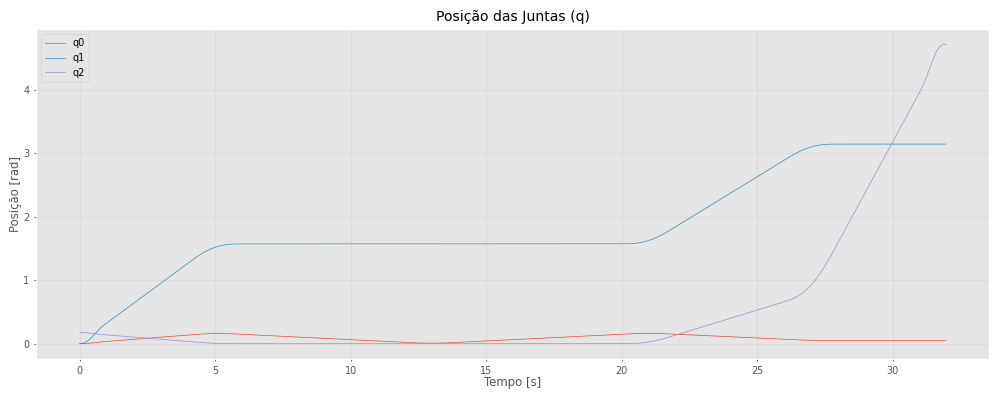

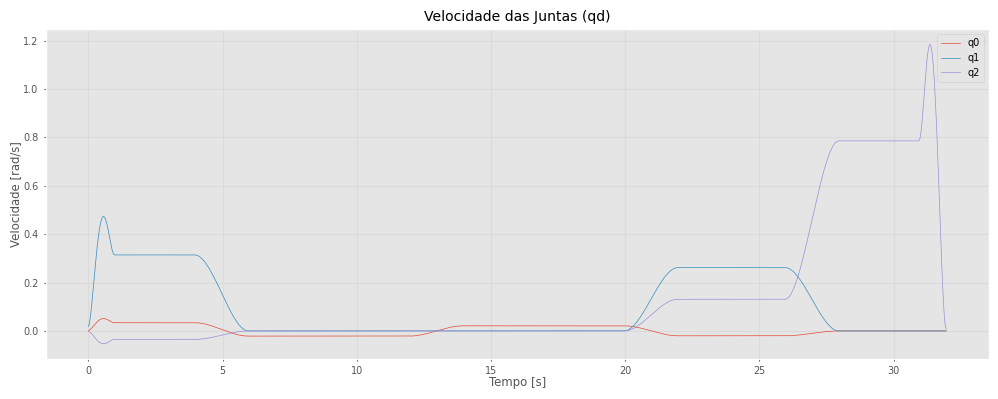

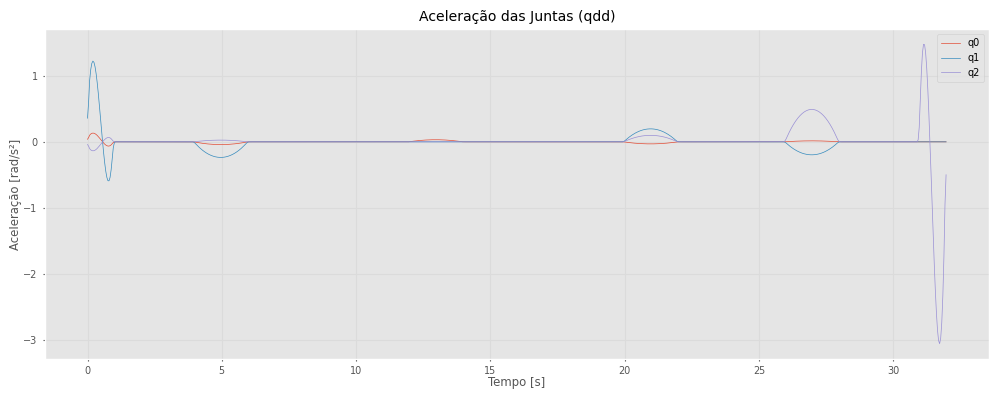

In [6]:


# PLOT DOS GRÁFICOS

# Plot das posições (q)
plt.figure(figsize=(10,4))
for i in range(q_des.shape[1]):
    plt.plot(t_des, q_des[:, i], label=f'q{i}')
plt.title('Posição das Juntas (q)')
plt.xlabel('Tempo [s]')
plt.ylabel('Posição [rad]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot das velocidades (qd)
plt.figure(figsize=(10,4))
for i in range(q_des.shape[1]):
    plt.plot(t_des, qd_des[:, i], label=f'q{i}')
plt.title('Velocidade das Juntas (qd)')
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade [rad/s]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot das acelerações (qdd)
plt.figure(figsize=(10,4))
for i in range(q_des.shape[1]):
    plt.plot(t_des, qdd_des[:, i], label=f'q{i}')
plt.title('Aceleração das Juntas (qdd)')
plt.xlabel('Tempo [s]')
plt.ylabel('Aceleração [rad/s²]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



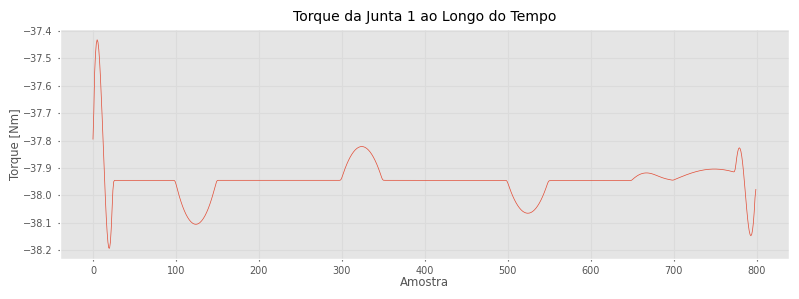

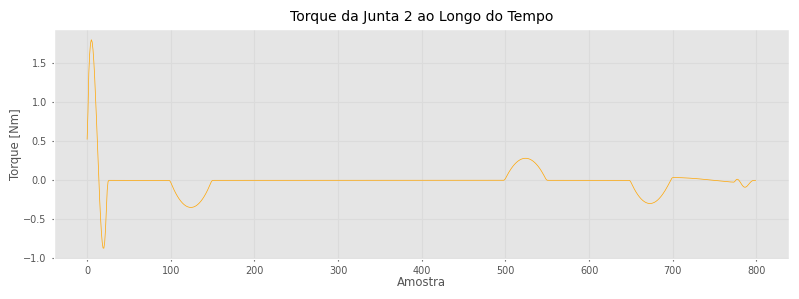

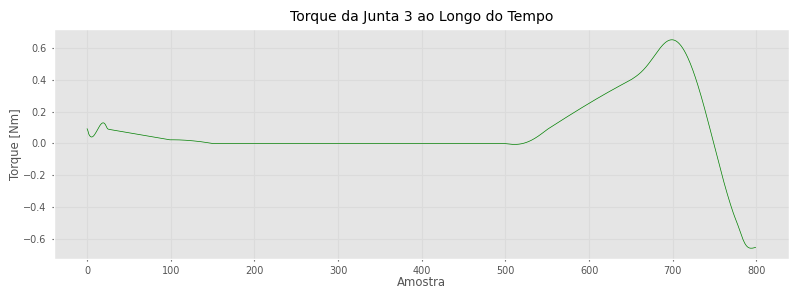

In [9]:
#PLOTS DE TORQUE IDEAL

# Cálculo do torque ideal usando a função rne (Robotic Newton-Euler)
g = 9.81

Qtraj = cookbot.rne(q_des, qd_des, qdd_des, gravity=[0, 0, g], symbolic=False)

t = np.arange(Qtraj.shape[0])  # vetor de tempo (amostras)

# Junta 1    
plt.figure(figsize=(8, 3))
plt.plot(t, Qtraj[:, 0], label='Torque Junta 1')
plt.xlabel('Amostra')
plt.ylabel('Torque [Nm]')
plt.title('Torque da Junta 1 ao Longo do Tempo')
plt.grid(True)
plt.tight_layout()
plt.show()

# Junta 2
plt.figure(figsize=(8, 3))
plt.plot(t, Qtraj[:, 1], label='Torque Junta 2', color='orange')
plt.xlabel('Amostra')
plt.ylabel('Torque [Nm]')
plt.title('Torque da Junta 2 ao Longo do Tempo')
plt.grid(True)
plt.tight_layout()
plt.show()

# Junta 3
plt.figure(figsize=(8, 3))
plt.plot(t, Qtraj[:, 2], label='Torque Junta 3', color='green')
plt.xlabel('Amostra')
plt.ylabel('Torque [Nm]')
plt.title('Torque da Junta 3 ao Longo do Tempo')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.show()
